<a href="https://colab.research.google.com/github/samyak1999/Twitter-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv
Saving train_E6oV3lV.csv to train_E6oV3lV.csv


In [ ]:
import io

train = pd.read_csv(io.BytesIO(uploaded['train_E6oV3lV.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test_tweets_anuFYb8.csv']))

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data cleaning

  +   The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
  +  We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
  + Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
  + Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
  +  In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information.


##  Removing Twitter Handles (@user)

In [ ]:
## Combining train and test to remove 
combi = train.append(test, ignore_index=True)

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [ ]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

## Removing Punctuations, Numbers, and Special Characters

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words
We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh”,"his","her","was" are of very little use. It is better to get rid of them.

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Tokenization
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

## Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

## Stitching the tokens back together

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

## Understanding the common words used in the tweets: WordCloud
A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

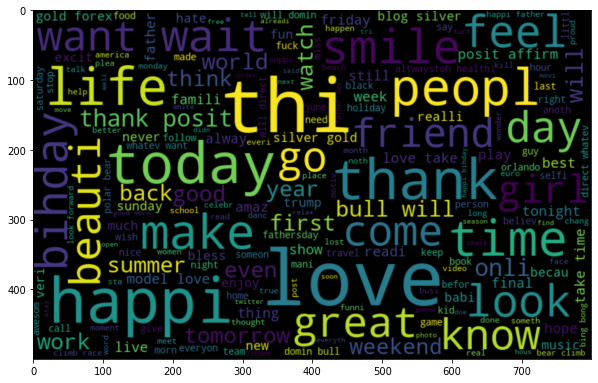

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,height =500 ,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="gaussian")
##plt.imshow(wordcloud, interpolation="hamming " )
plt.axis('off')
plt.show()

## B) Words in non racist/sexist tweets

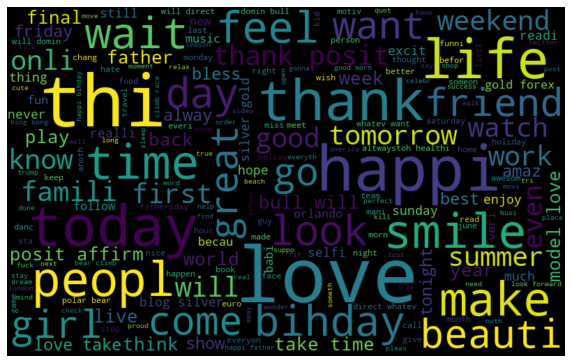

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Racist/Sexist Tweets

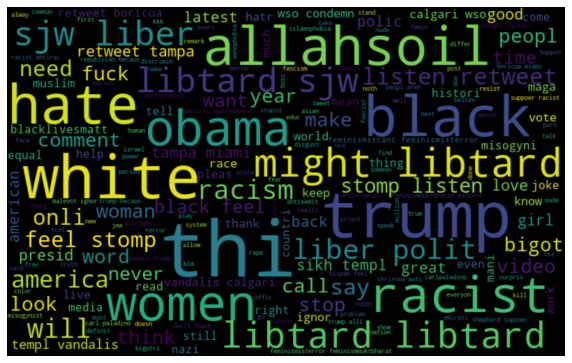

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis('off')
plt.show()

## Dealing with HashTags in Tweets
Hashtags encourage social media users to explore content that catches their eye. Associations can use hashtags to reach their target audience and to help members filter information.

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. 



In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht)

    return hashtags

### Extracting hashtags from non racist/sexist and racist/sexist tweets

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

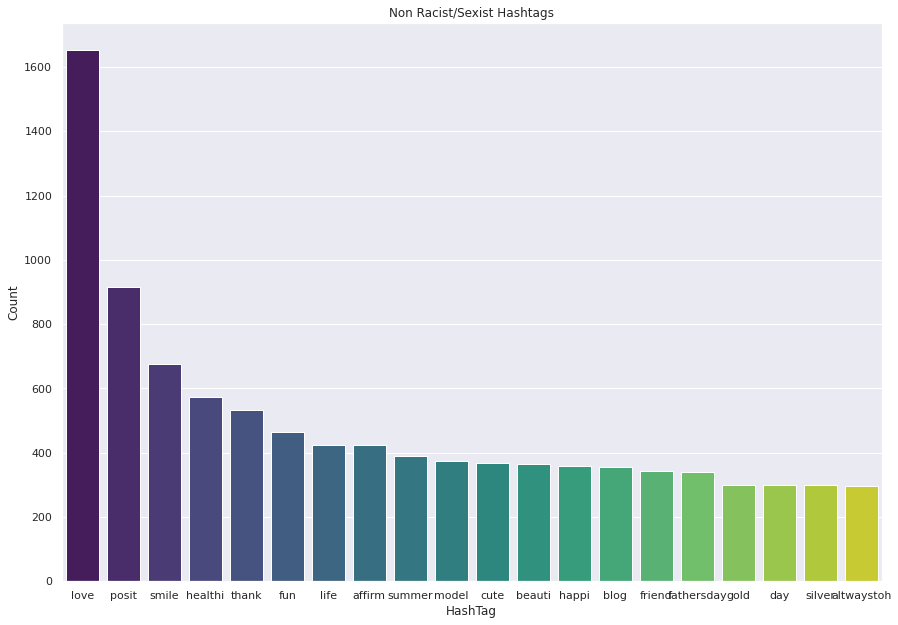

In [ ]:
a = nltk.FreqDist(HT_regular)
d= pd.DataFrame({'HashTag': list(a.keys()),
                   'Count': list(a.values())})
d = d.nlargest(columns = "Count",n=20)
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = sns.barplot(data=d,x="HashTag",y="Count",palette='viridis').set_title("Non Racist/Sexist Hashtags")
plt.show()


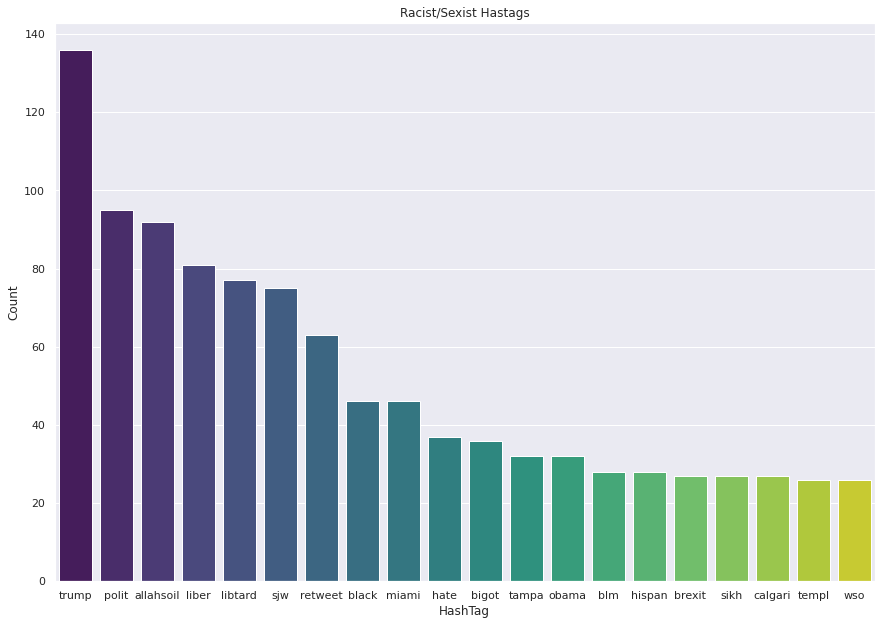

In [ ]:
a = nltk.FreqDist(HT_negative)
d= pd.DataFrame({'HashTag': list(a.keys()),
                   'Count': list(a.values())})
d = d.nlargest(columns = "Count",n=20)
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = sns.barplot(data=d,x="HashTag",y="Count",palette='viridis').set_title("Racist/Sexist Hastags")
plt.show()
